# Crawling 크롤링

- 웹 상의 데이터를 수집하기 위해서 크롤링을 사용
- 웹 페이지 접속(요청) -> (응답) / -> 해당 웹 페이지에 어디에 위치 -> 값을 가져옴 -> 어떤 데이터 형식인지 -> 데이터 변환 -> 데이터 저장
- Python: Numpy, Pandas, Requests, BeautifulSoup ...
- 데이터 수집

## 요청 라이브러리: Requests

- !pip install requests
- HTTP 요청을 보내는데 사용하는 라이브러리
- 클라이언트의 요청

In [2]:
import requests

In [ ]:
print(requests.__version__)

2.27.1


In [ ]:
html = requests.get('http://www.paullab.co.kr/stock.html')
html

<Response [200]>

In [ ]:
html.text

'<!DOCTYPE html>\n<html lang="en">\n\n<head>\n  <meta charset="UTF-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n  <meta http-equiv="X-UA-Compatible" content="ie=edge">\n  <title>Document</title>\n  <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css">\n  <link rel="stylesheet" type="text/css" href="https://pro.fontawesome.com/releases/v5.10.0/css/all.css" integrity="sha384-AYmEC3Yw5cVb3ZcuHtOA93w35dYTsvhLPVnYs9eStHfGJvOvKxVfELGroGkvsg+p" crossorigin="anonymous">\n  <style>\n    h1{\n      margin: 2rem;\n    }\n    h1>span{\n      font-size: 1rem;\n    }\n    .main {\n      width: 80%;\n      margin: 0 auto;\n      text-align: center;\n    }\n\n    table {\n      width: 100%;\n    }\n\n    a {\n      color: inherit;\n      cursor: pointer;\n      text-decoration: none;\n    }\n\n    a:hover {\n      color: #000;\n      text-decoration: none;\n    }\n\n    em {\n      font: inherit;\n    }\n\n    #informa

In [ ]:
# 포스트 요청 보내는 방법
'''
import json
body = {'id:'aaa','pw':'1234'}
post = requests.post('url', data=json.dumps(body))
'''

## BeautifulSoup

In [3]:
from bs4 import BeautifulSoup

html = requests.get('http://paullab.co.kr/stock.html')
text = html.text

In [6]:
soup = BeautifulSoup(text, 'html.parser')  # 'html.parser;, 'xml' 

In [7]:
soup.title

<title>Document</title>

In [8]:
soup.title.string  # 태그 안에 있는 값을 가져옴?

'Document'

In [9]:
soup.title.text

'Document'

In [ ]:
# 직접 태그를 불러오는 방법
soup.table # <table> </table>
# <tr> </tr>
# <th> </th>
# <td> </td>

In [ ]:
soup.tr

In [12]:
# find를 사용해 태그를 불러오는 방법
soup.find('table')  # soup.table , soup.title == soup.find('title')

In [ ]:
# 모든 table 태그를 불러옴
soup.find_all('table')  # <태그 속성='값'> </태그>
                        # id='stock': 페이지 당 하나
                        # class='2022': 페이지 당 여러 개 -> selector(선택자)

In [ ]:
soup.find(id=('update'))  # id는 값이 하나뿐이라 find_all을 사용할 필요가 없다.

<span id="update">update : 20.12.30 / 해외 크롤링이 Block되어 있으므로 크롤링이 안되시는 분은 이 URL(http://paullab.synology.me/stock.html)을 사용하세요.</span>

In [15]:
soup.find_all('table',class_='table')  # find_all -> 결과값이 여러 개라 리스트로 출력

[<table class="table table-hover">
 <tbody>
 <tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span

In [32]:
soup.find_all('table', {'class': 'table'})

[<table class="table table-hover">
 <tbody>
 <tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span

In [ ]:
tag = soup.find(id=('update'))  # id가 update인 태그는 span 태그밖에 없음
tag.name

'span'

In [ ]:
tag['id']

In [ ]:
# find(), find_all()

# id, class -> selector
# id: #id명, class: .class명

# soup.find(id='update'), # soup.find(id=('update')) 둘 다 가능
soup.select('#update')  # 리스트로 결과 출력  id라 #id명
soup.select('.table')   # class라 .class명

In [ ]:
# <table> <tbody> <tr> ... </tr> </tbody> </table>
# <table>  >  <tbody>  >  <tr>

soup.select('.table > tbody')  # 리스트 형태로 리턴

In [ ]:
soup.select('.table > tbody > tr')  # 리스트 형태로 리턴

In [ ]:
# 여러 번 접근하기

one = soup.select('.main')[2]
one  # div > h2, h3, table  태그가 닫힌 다음에 나오는 태그는 하위태그가 아니라 같은 태그
     # div > h2, h3, table # #information > div > div.tables
     # 크롬 브라우저 -> 오른쪽 클릭 -> 검사 -> (왼쪽 상단) 마우스 클릭 모양 선택 -> 내가 원하는 곳을 찾는다.
     # -> 오른쪽 클릭 -> copy -> copy select -> 자동으로 경로 복사
     # body > div:nth-child(5) > table

In [ ]:
two = one.select('tbody > tr')
two

In [ ]:
one # div > h2, h3, table # #information > div > div.tables
    # 크롬 브라우저 -> 오른쪽 클릭 -> 검사 -> (왼쪽 상단) 마우스 클릭 모양 선택 -> 내가 원하는 곳을 찾는다.
    # -> 오른쪽 클릭 -> copy -> copy select -> 자동으로 경로 복사
    # body > div:nth-child(5) > table

In [ ]:
# body > div:nth-child(3) > table

In [ ]:
a = soup.find_all('table', class_='table')[0] # -> [a, b, c ...]

## FinanceDataReader

- 주식 가격, 지수, 환율, 암화 화폐 가격 ... 
- 시계열 데이터 수집
- 거래소별, 종목(코드)별, 단축(코드)별 데이터 수집 가능

### 라이브러리 설치

In [ ]:
!pip install finance-datareader

In [18]:
import FinanceDataReader as fdr

In [19]:
fdr.__version__

'0.9.50'

# krx 한국 거래소의 주식 리스트

In [ ]:
# fdr 이용해서 데이터를 불러오면 -> 데이터프레임 형태

df_krx = fdr.StockListing('krx')
'''
KOSPI 코스피 종목, KODAQ 코스닥, NASDAQ 나스닥, NYSE 뉴욕증권거래소, S&P500...
'''

In [22]:
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,70400,1,1600,2.33,69800,70400,69500,14693150,1029129224350,420272691520000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,577000,2,-6000,-1.03,580000,583000,575000,71897,41645973000,135018000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,109200,1,5700,5.51,107500,109700,106100,6803049,732398630600,79497858258000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,778000,2,-1000,-0.13,778000,782000,773000,13815,10747741000,55373372000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,702000,2,-10000,-1.40,708000,716000,697000,95049,67121442000,49555824786000,70592343,STK


In [23]:
df_krx.shape  # 2717개 주식 종목의 17가지 정보

(2717, 17)

In [24]:
df_krx.describe()

,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks
count,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2.717000e+03,2.717000e+03,2.717000e+03,2.717000e+03
mean,-110.690099,-0.478535,20853.210894,21091.714023,20538.173353,4.586772e+05,4.396257e+09,8.972484e+11,4.186701e+07
std,927.055020,2.743292,53295.045906,53749.787072,52639.849974,2.503704e+06,2.849045e+10,9.083775e+12,1.343060e+08
min,-22000.000000,-15.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.216000e+09,1.098520e+05
25%,-125.000000,-1.510000,2865.000000,2900.000000,2800.000000,1.126400e+04,7.446260e+07,6.294524e+10,1.001394e+07
50%,-30.000000,-0.590000,6780.000000,6920.000000,6650.000000,4.736800e+04,3.060993e+08,1.260184e+11,1.954779e+07
75%,0.000000,0.000000,16880.000000,17200.000000,16580.000000,1.688040e+05,1.506926e+09,3.018474e+11,4.123263e+07
max,12500.000000,30.000000,778000.000000,782000.000000,773000.000000,6.685953e+07,1.029129e+12,4.202727e+14,5.969783e+09


In [25]:
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         2717 non-null   object 
 1   ISU_CD       2717 non-null   object 
 2   Name         2717 non-null   object 
 3   Market       2717 non-null   object 
 4   Dept         2717 non-null   object 
 5   Close        2717 non-null   object 
 6   ChangeCode   2717 non-null   object 
 7   Changes      2717 non-null   int64  
 8   ChagesRatio  2717 non-null   float64
 9   Open         2717 non-null   int64  
 10  High         2717 non-null   int64  
 11  Low          2717 non-null   int64  
 12  Volume       2717 non-null   int64  
 13  Amount       2717 non-null   int64  
 14  Marcap       2717 non-null   int64  
 15  Stocks       2717 non-null   int64  
 16  MarketId     2717 non-null   object 
dtypes: float64(1), int64(8), object(8)
memory usage: 361.0+ KB


## 005930 코드번호를 이용해서 단일 종목의 주식 가격을 알아봄

In [28]:
samsaung_df = fdr.DataReader('005930')
samsaung_df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-02-10,1653,1675,1604,1634,664282,NaN
1999-02-11,1661,1678,1643,1644,287590,0.006120
1999-02-12,1682,1751,1667,1743,403600,0.060219
1999-02-18,1712,1721,1682,1687,440930,-0.032129
1999-02-19,1663,1663,1602,1653,503847,-0.020154
...,...,...,...,...,...,...
2023-05-22,68400,69000,68000,68500,14470308,0.001462
2023-05-23,68500,68700,68100,68400,8561643,-0.001460
2023-05-24,68100,68700,68000,68500,8192896,0.001462


In [30]:
samsaung_df_2022_ = fdr.DataReader('005930','2022')  # 2022년부터의 값
samsaung_df_2022_

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2023-05-22,68400,69000,68000,68500,14470308,0.001462
2023-05-23,68500,68700,68100,68400,8561643,-0.001460
2023-05-24,68100,68700,68000,68500,8192896,0.001462


In [ ]:
samsaung_df_2022_ = fdr.DataReader('005930','2022-01-03','2022-03-31')  # 2022년부터 ~ 22년 12월 마지막 날까지
samsaung_df_2022_

### 상장폐지 종목 데이터

In [ ]:
del_stock = fdr.DataReader('003497', exchange='krx-delisting')  # 003497 상장 폐지 -> krx에는 데이터가 없음
# exchage = 'krx-delisting' 에서 찾아와야함
del_stock

## 단일 종목 그래프

<Axes: xlabel='Date'>

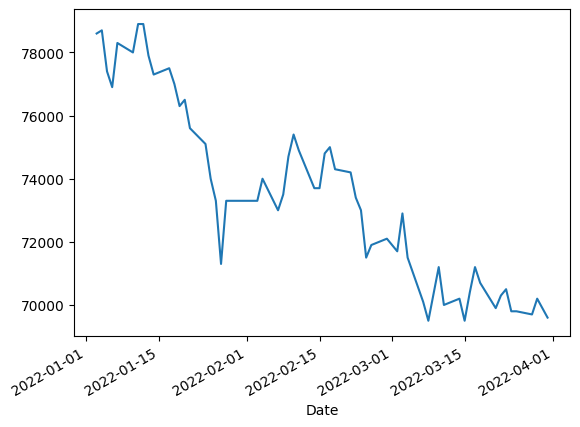

In [37]:
samsaung_df_2022_['Close'].plot()  # 종가 데이터로 그래프 그리기

<Axes: xlabel='Date'>

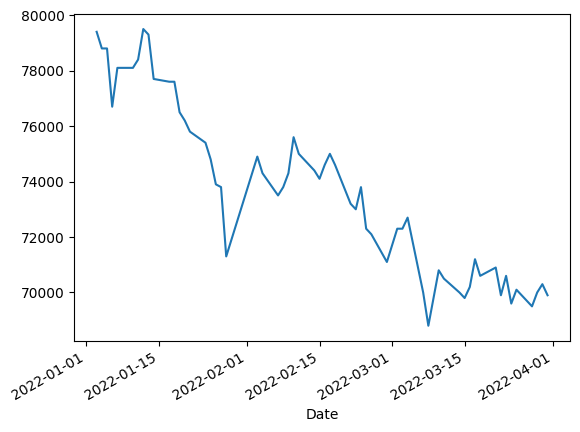

In [40]:
samsaung_df_2022_['Open'].plot()  # 시가 데이터로 그래프 그리기

## 환율 데이터

In [ ]:
ex_us_kw_df = fdr.DataReader('USD/KRW', '2023')
ex_us_kw_df
# '''
# EUR/USD(유로당 달러), CNY/KRW(위엔당 원), JPY/KRW(엔당 원), USD/JPY(달러당 엔)...
# '''

<Axes: xlabel='Date'>

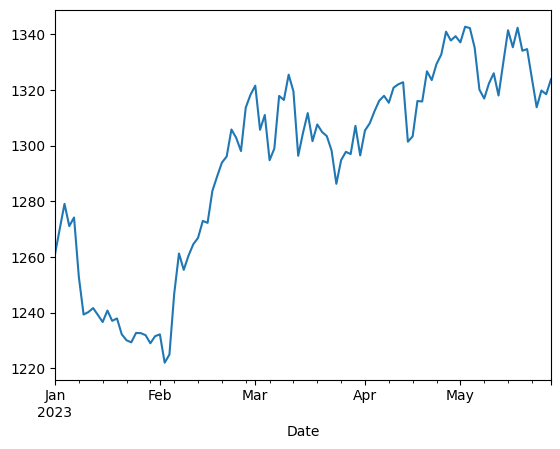

In [43]:
ex_us_kw_df['Close'].plot()  # 달러 환율

## 암호화폐 데이터

In [ ]:
btc_krw_df = fdr.DataReader('BTC/KRW', '2023')
btc_krw_df
'''
BTC/KRW(비트코인당 원), ETH/KRW(이더리움당 원), XRP/KRW(리플당 원)
BTC/USD(비트코인당 달러) ...
'''

In [ ]:
btc_krw_df['Close'].plot()

- 웹 상의 데이터를 클롤링
- 파일 형태의 데이터들
 - 한글, 엑셀, PDF

## 파일 데이터  (참고용 코드)

### 한글(.hw)파일 크롤링
- ole 라이브러리

#### ole 라이브러리 설치

In [45]:
!pip install ole-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
import ole 

# 경로 설정
dir_path = 'data_hwp/'

# 파일 이름 설정
hwp_name = '예제.hwp'

# 경로 + 파일
hwp_path = os.path.join(dir_path, hwp_name)

# 불러오기
f = ole.open(hwp_path)

content = f.get_stream('PrvText').read().decode('utf-16le')
print(content)  # ↓의 결과가 나온다

```
[서식. 참가신청서] 
<교육 참가신청서>
<교 육 명><인공지능을 활용한 업무자동화 교육>
<교육일시><2019년 2월 15일(금) ~ 17일(일), 2박 3일>
<참가자 정보><성    명><홍길동><소    속><세종대학교><연 락 처><010.0000.0000>
<E-mail><example_jeju_gdg><주    소><서울특별시 중랑구><연 령 대>
<□ 10대       □ 20대      □ 30대      □ 40대이상>
<신청내용><관심분야 (중복선택가능)>
<□ HTML&CSS  □ Javascript  □ Python  □ 서비스기획·런칭  □ 기타 (          )>
<지원동기 (자유롭게 서술)>
<평소에 파이썬에 관심이 많았습니다.  업무자동화를 저의 업무에 적용하고 싶었는데.  
마침 좋은 기회가 있어서 지원하게 되었습니다.  이런 기회를 주셔서 감사합니다. >
<기술역량  및 경험 (자유롭게 서술)><파이썬은 1년 했고, 다른 쪽 개발 경험은 없습니다.  파이썬을 배우고 싶습니다. >
<상기와 같이 참가를 신청합니다. 2019년   1월   일 <신 청 자 :><홍길동><(서명 또는 날인) >>
```

In [ ]:
# excel 파일로 변환하기

columns = ['Name', 'Company', 'Phone', 'e-mail', 'why', 'experience']

df = pd.DataFrame(columns=columns)


# 읽어온 값을 hwp 분리해서 딕셔너리
word_list = content.split('><')
target_list = ['성    명', '소    속', '연 락 처', 'E-mail', '주    소', '연 령 대']

info_dict = {} # 데이터 추출후 저장할 빈 딕셔너리

In [ ]:
# 데이터 프레임으로 만들기
for n, target in enumerate(target_list):
  info = word_list[word_list.index(target) + 1]
  info_dict[column[n]] = info

df = pd.DataFrame(data=info_dict, index=[0], columns=columns)
df

In [ ]:
# 엑셀 파일로 추출
df.to_exel('예제.xlsx')

## PDF 데이터 크롤링

In [ ]:
# 모듈 임포트
# !pip install pdfminer
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

In [ ]:
# pdf를 txt로 불러오기?

def pdf2txt(pdf_file):
    rsrcmgr = PDFResourceManager()
   
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(pdf_file, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()
    
    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,
                                 caching=caching, check_extractable=True):
        interpreter.process_page(page)
    
    text = retstr.getvalue()
    
    fp.close()
    device.close()
    retstr.close()
    return text

In [ ]:
# pdf 파일 불러오기

import os
os.chdir('C:\workspace')
os.listdir('sample/')
pdf_path='sample/「인공지능 업무자동화교육」 참가신청서.pdf'

In [ ]:
text = pdf2txt(pdf_path)
text # text 파일로 변환해줌

# 연습문제
- Requests, BeautifulSoup을 이용해서 데이터를 가져와야하는데
- http://www.paullab.co.kr/stock.html 데이터 중 main 클래스의 2번째(1 인덱스)값을 가져와주세요


In [ ]:
import requests
from bs4 import BeautifulSoup

html = requests.get('http://paullab.co.kr/stock.html')
text = html.text

soup = BeautifulSoup(text, 'html.parser')  # 'html.parser;, 'xml' 
soup.select('.main')[1]

In [ ]:
# soup.select('.main')[1]
# soup.find_all('div', {'class': 'main'})[1]
# soup.find_all('div', class_= 'main')[1]    다 같은거?

- 제주코딩베이스캠프 연구원의 일별 시세 테이블을 가져와주세요.

In [ ]:
import requests
from bs4 import BeautifulSoup

html = requests.get('http://paullab.co.kr/stock.html')
text = html.text

soup = BeautifulSoup(text, 'html.parser')

# 내가 한거  이건 왜 정답이 아닐까
# soup.select('.table')[0]

# 1번 방법
soup.select('body > div:nth-child(3) > table')  # 홈페이지 검사에서 copy select로 복사해오기

# 2번 방법
#one = soup.select('.main')[2]
#two = one,select('table')

- (주) 캣네생선의 왼쪽 이미지를 불러온 뒤, 위 아래 반전시켜주세요.

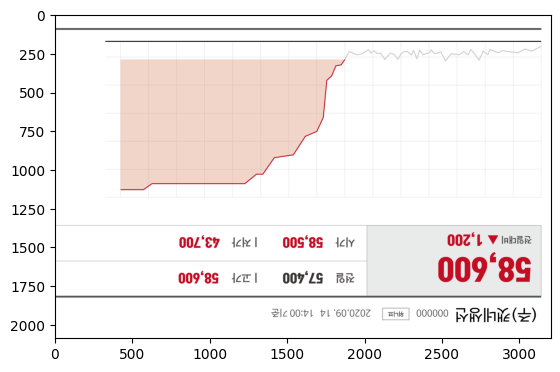

In [80]:
!pip install Pillow

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

stock = Image.open('stock.jpg')
pixel = np.array(stock)

plt.imshow(pixel[::-1])  # 상하반전
plt.imshow(pixel[::-1, ::-1]) # 좌우반전

- sk하이닉스의 2020년도 데이터를 출력하고 그 시가 데이터를 그래프로 나타내주세요.

<Axes: xlabel='Date'>

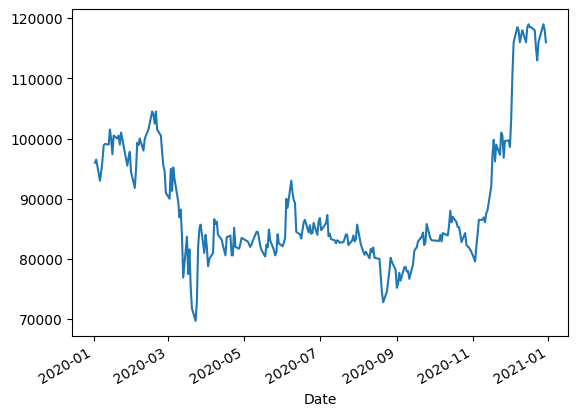

In [78]:
!pip install finance-datareader
import FinanceDataReader as fdr

df_krx = fdr.StockListing('krx')  # 주식 데이터 불러오기
df_krx  # sk하이닉스 코드 확인

sk_df = fdr.DataReader('000660','2020-01-01','2020-12-31')
sk_df['Open'].plot()